In [1]:
import numpy as np
import random 

import matplotlib.pyplot as plt 

from keras.models import Sequential  
from keras.callbacks import EarlyStopping

from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras import utils
from tensorflow.keras.optimizers import SGD

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

In [2]:
data_train = np.load('kmnist-train-imgs.npz')
labels_train = np.load('kmnist-train-labels.npz')
data_test = np.load('kmnist-test-imgs.npz')
labels_test = np.load('kmnist-test-labels.npz')

In [3]:
k_train_samples = data_train['arr_0']
k_train_labels = labels_train['arr_0']
k_test_samples = data_test['arr_0']
k_test_labels = labels_test['arr_0']

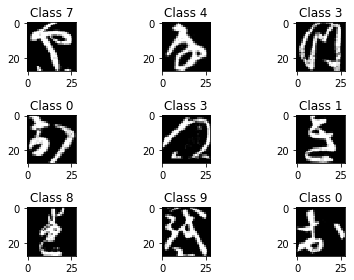

In [4]:
for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(k_train_samples))
    plt.imshow(k_train_samples[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(k_train_labels[num]))
    
plt.tight_layout()

In [5]:
X_train = k_train_samples.reshape(60000, 784) 
X_test = k_test_samples.reshape(10000, 784)   

X_train = X_train.astype('float32')   
X_test = X_test.astype('float32')

X_train /= 255                        
X_test /= 255

X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)


In [6]:
no_classes = 10

Y_train = utils.to_categorical(k_train_labels, no_classes)
Y_test = utils.to_categorical(k_test_labels, no_classes)

In [7]:
models = []
layer_width = []
layer_height = []
for i in range(1,6):
    for j in range(1,6):
        count = 0
        lw = i*10
        lh = j
        model = Sequential()
        model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', input_shape=(28,28,1)))
        model.add(MaxPooling2D((2,2)))
        model.add(Flatten())
        while count < j:
            model.add(Dense(lw, activation='relu', kernel_initializer='he_uniform'))
            count += 1
        model.add(Dense(10, activation='softmax'))
        model.summary()
        layer_width.append(lw)
        layer_height.append(lh)
    models.append(model)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 54,520
Trainable params: 54,520
Non-trainable params: 0
____________________________________________________

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_9 (Flatten)         (None, 5408)              0         
                                                                 
 dense_34 (Dense)            (None, 20)                108180    
                                                                 
 dense_35 (Dense)            (None, 20)                420       
                                                                 
 dense_36 (Dense)            (None, 20)                420       
                                                      

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 flatten_16 (Flatten)        (None, 5408)              0         
                                                                 
 dense_62 (Dense)            (None, 40)                216360    
                                                                 
 dense_63 (Dense)            (None, 40)                1640      
                                                                 
 dense_64 (Dense)            (None, 10)                410       
                                                                 
Total para

 dense_99 (Dense)            (None, 10)                510       
                                                                 
Total params: 281,480
Trainable params: 281,480
Non-trainable params: 0
_________________________________________________________________


In [9]:
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1]
momentums = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
sgd_models = []
count = 0
for model in models:
    for lr in learning_rates:
        for m in momentums:
            sgd_models.append(model)
            opt = SGD(learning_rate=lr, momentum=m)
            sgd_models[count].compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
            count += 1

In [19]:
#np.random.seed(0)
callback = EarlyStopping(monitor='loss', patience=2, min_delta=0.1)
histories = []
random_indices = random.sample(range(len(sgd_models)), 20)
for idx in random_indices:
    #idx = np.random.choice(X_train.shape[0], 5000, replace=True)
    histories.append( sgd_models[idx].fit(X_train, Y_train,
              batch_size=128, epochs=10,
              verbose=1,callbacks=[callback]))

Epoch 1/10
469/469 [==============================] - 11s 24ms/step - loss: 2.3235 - accuracy: 0.0996
Epoch 2/10
469/469 [==============================] - 11s 22ms/step - loss: 2.3192 - accuracy: 0.0980
Epoch 3/10
469/469 [==============================] - 11s 24ms/step - loss: 2.3225 - accuracy: 0.0983
Epoch 1/10
469/469 [==============================] - 11s 23ms/step - loss: 2.3208 - accuracy: 0.0975
Epoch 2/10
469/469 [==============================] - 12s 25ms/step - loss: 2.3213 - accuracy: 0.0995
Epoch 3/10
469/469 [==============================] - 11s 24ms/step - loss: 2.3223 - accuracy: 0.0989
Epoch 1/10
469/469 [==============================] - 12s 26ms/step - loss: nan - accuracy: 0.1000
Epoch 2/10
469/469 [==============================] - 12s 26ms/step - loss: nan - accuracy: 0.1000
Epoch 1/10
469/469 [==============================] - 12s 26ms/step - loss: nan - accuracy: 0.1000
Epoch 2/10
469/469 [==============================] - 12s 25ms/step - loss: nan - accuracy:

In [21]:
find_best_model = []
for history in histories:
    find_best_model.append(history.history['loss'][-1])

index = np.argmin(find_best_model)
best_model = models[index]

print("Chosen Model: " + str(index))
print("Final Loss: " + str(find_best_model[index]))
print("Final Accuracy: " + str(histories[index].history['accuracy'][-1]))
#print("Final Learning Rate: " + str(chosen_lr[index]))
#print("Final Momentum: " + str(chosen_m[index]))
print("Layer Width: " + str(layer_width[index]))

Chosen Model: 2
Final Loss: nan
Final Accuracy: 0.10000000149011612
Layer Width: 10


In [16]:
score = best_model.evaluate(X_test, Y_test)
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 4ms/step - loss: 1.5419 - accuracy: 0.7894
Test accuracy: 0.7893999814987183


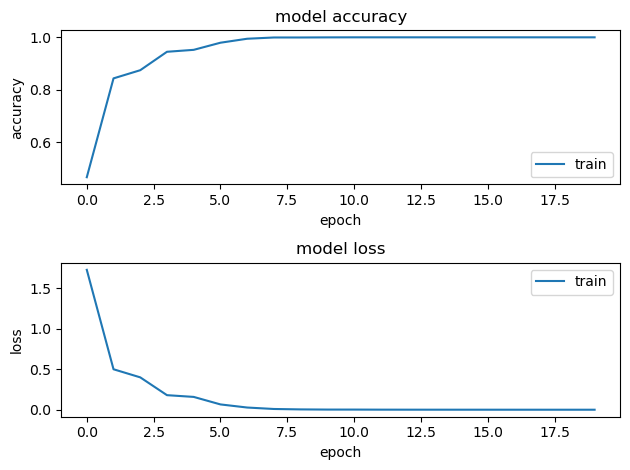

In [17]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(histories[index].history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(histories[index].history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [18]:
results = best_model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


313/313 [==============================] - 1s 4ms/step
Accuracy: 0.7894
Weighted Precision: 0.7933314405941213
Weighted Recall: 0.7894
Weighted F1 Score: 0.789827671440989


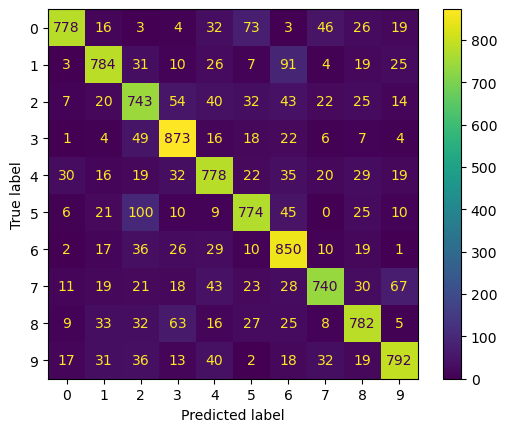

In [19]:
predicted_classes = best_model.predict(X_test)

true_labels = np.argmax(Y_test,axis=1)

predicted_labels = np.argmax(predicted_classes,axis=1)

cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

print("Accuracy: " + str(accuracy_score(true_labels, predicted_labels)))
print("Weighted Precision: " + str(precision_score(true_labels, predicted_labels, average='weighted')))
print("Weighted Recall: " + str(recall_score(true_labels, predicted_labels, average='weighted')))
print("Weighted F1 Score: " + str(f1_score(true_labels, predicted_labels, average='weighted')))

In [20]:
y_pred_ensemble = np.zeros((Y_test.shape))

#print(y_pred_ensemble.shape)

#count = 0
#for i in range(y_pred_ensemble.shape[0])
for model in models:
    y_pred_ensemble += model.predict(X_test)

y_pred_ensemble /= len(models)
    

313/313 [==============================] - 2s 5ms/step


### Extensions to the project
1. Alter parameters of layers (Number of perceptrons, more Convolution and pooling layers) 
2. Preprocessing on the data (filter?)
3. Ensemble learning
4. Utilize Graphcore IPU

In [21]:
#print(y_pred_ensemble)
#print(np.argmax(y_pred_ensemble, axis=1))
ensemble_pred = np.argmax(y_pred_ensemble, axis=1)

Accuracy: 0.8404
Weighted Precision: 0.8431929486961726
Weighted Recall: 0.8404
Weighted F1 Score: 0.8405224380378155


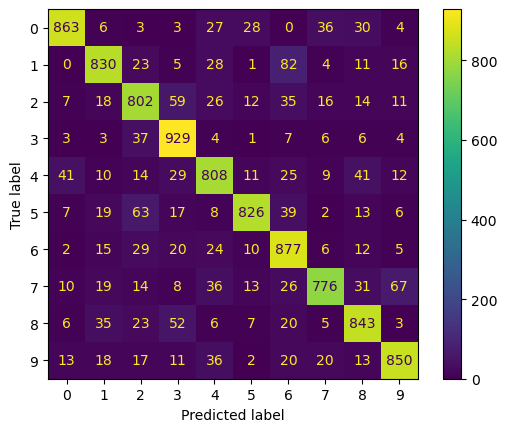

In [22]:
#predicted_classes = ensemble_pred

true_labels = np.argmax(Y_test,axis=1)

predicted_labels = ensemble_pred

cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

print("Accuracy: " + str(accuracy_score(true_labels, predicted_labels)))
print("Weighted Precision: " + str(precision_score(true_labels, predicted_labels, average='weighted')))
print("Weighted Recall: " + str(recall_score(true_labels, predicted_labels, average='weighted')))
print("Weighted F1 Score: " + str(f1_score(true_labels, predicted_labels, average='weighted')))